### Setting up the environment:

In [2]:
#1# Importing libraries: 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler


from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

RSEED=50

#2# Visualizing the dataset:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#3# Importing the original dataset with dummies:
df_fraud_elc = pd.read_csv('./data/df_elect_mod.csv')

FileNotFoundError: [Errno 2] No such file or directory: './data/df_elect_mod.csv'

#### Creating the filtered data frame: 

In [ ]:
df_fraud_elc.head()

,ID,invoice_date,tarif_type,counter_statue,reading_remarque,counter_coefficient,Total_Consumtions,client_catg,region,target
0,0,3/24/2014,11,0,8,1,82,11,101,0
1,0,3/29/2013,11,0,6,1,1384,11,101,0
2,0,3/23/2015,11,0,8,1,123,11,101,0
3,0,7/13/2015,11,0,8,1,102,11,101,0
4,0,11/17/2016,11,0,9,1,572,11,101,0


In [ ]:
# Define the aggregation functions for each column
agg_functions = {
    'invoice_date': ['min', 'max'],  # Min, and Max invoice dates
    'tarif_type': 'first',
    'counter_statue': 'first', 
    'reading_remarque': ['min', 'max', 'std'],  #Min, and Max reading remarks
    'counter_coefficient': 'first',
    'client_catg': 'first',
    'region': 'first',
    'target': 'first',
    'Total_Consumtions': ['sum', 'mean', 'min', 'max', 'median', 'std']
}

# Group the data by customer ID
df_fraud_elc = df_fraud_elc.groupby('ID').agg(agg_functions).reset_index()

# Rename the columns for clarity
df_fraud_elc.columns = ['ID', 'Min_Invoice_Date', 'Max_Invoice_Date', 'tarif_type', 
                          'counter_statue', 'Min_Reading_Remark', 'Max_Reading_Remark','std_Reading_Remark',
                          'counter_coefficient', 'client_catg', 'region', 'target', 
                          'Total_Consumption_Sum', 'Average_Consumption', 'Min_Consumption', 'Max_Consumption', 
                          'Median_Consumption', 'Std_Consumption']

# Display the resulting DataFrame
df_fraud_elc.head(5)

,ID,Min_Invoice_Date,Max_Invoice_Date,tarif_type,counter_statue,Min_Reading_Remark,Max_Reading_Remark,std_Reading_Remark,counter_coefficient,client_catg,region,target,Total_Consumption_Sum,Average_Consumption,Min_Consumption,Max_Consumption,Median_Consumption,Std_Consumption
0,0,1/4/2008,7/28/2008,11,0,6,9,1.248,1,11,101,0,12704,362.971,38,1386,267.000,341.554
1,1,1/10/2013,9/6/2011,11,0,6,9,1.377,1,11,107,0,20629,557.541,190,1207,520.000,197.936
2,10,10/10/2014,6/19/2006,11,0,6,9,1.259,1,11,301,0,15057,836.500,188,3082,655.500,646.808
3,11,10/4/2018,8/20/2007,10,0,6,9,1.055,1,11,306,0,16180,404.500,159,1133,312.500,262.048
4,12,10/12/2014,9/8/2017,10,0,6,9,1.095,1,11,104,0,7730,483.125,7,1466,398.000,348.010


In [ ]:
df_fraud_elc= df_fraud_elc.drop(['Min_Invoice_Date','Max_Invoice_Date'], axis=1)
df_fraud_elc["target"].replace(10, 1, inplace=True)
df_fraud_elc["Std_Consumption"].fillna(0, inplace=True)
df_fraud_elc["std_Reading_Remark"].fillna(0, inplace=True)


In [ ]:
df_fraud_elc_cate= df_fraud_elc.astype({"tarif_type": "category","counter_statue": "category","counter_coefficient": "category","client_catg": "category"})
df_fraud_elc_cate= df_fraud_elc.drop(['ID', 'Min_Reading_Remark','Max_Reading_Remark'], axis=1)

df_fraud_elc_cate.head()

,tarif_type,counter_statue,std_Reading_Remark,counter_coefficient,client_catg,region,target,Total_Consumption_Sum,Average_Consumption,Min_Consumption,Max_Consumption,Median_Consumption,Std_Consumption
0,11,0,1.248,1,11,101,0,12704,362.971,38,1386,267.000,341.554
1,11,0,1.377,1,11,107,0,20629,557.541,190,1207,520.000,197.936
2,11,0,1.259,1,11,301,0,15057,836.500,188,3082,655.500,646.808
3,10,0,1.055,1,11,306,0,16180,404.500,159,1133,312.500,262.048
4,10,0,1.095,1,11,104,0,7730,483.125,7,1466,398.000,348.010


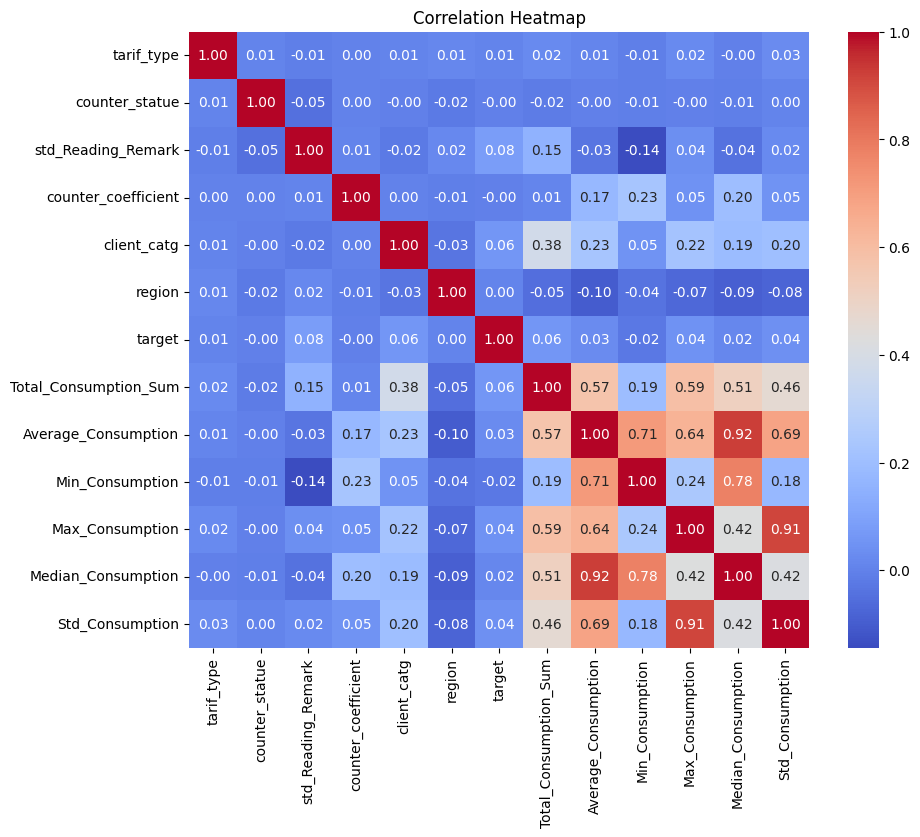

In [ ]:

# Calculate the correlation matrix
correlation_matrix = df_fraud_elc_cate.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add a title
plt.title('Correlation Heatmap')

# Show the heatmap
plt.show()


In [ ]:
total_columns = df_fraud_elc_cate.shape()
total_columns

TypeError: 'tuple' object is not callable

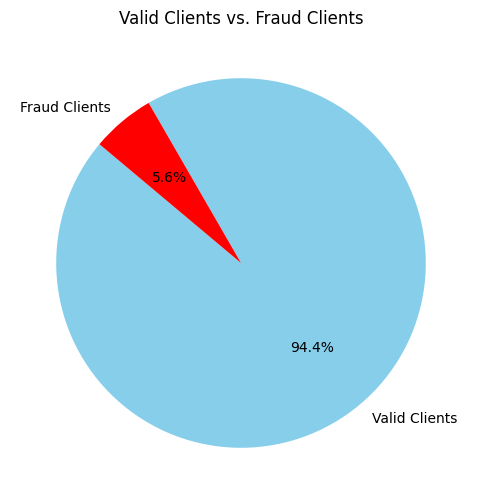

In [ ]:
import matplotlib.pyplot as plt

# Data
Valid_clients = 29846
Fraud_clients = 1757

# Define categories (labels)
categories = ['Valid Clients', 'Fraud Clients']

# Create a pie chart
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.pie([Valid_clients, Fraud_clients], labels=categories, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'red'])

# Add a title
plt.title('Valid Clients vs. Fraud Clients')

# Show the plot
plt.show()


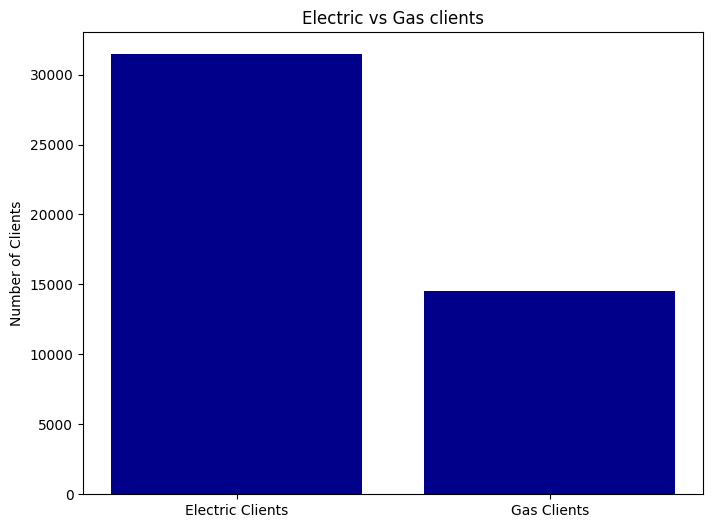

In [ ]:
Ele_clients = 31449
gas_clients = 14512

# Create a bar plot
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.bar(['Electric Clients', 'Gas Clients'], [Ele_clients, gas_clients], color=['darkblue', 'darkblue'])

# Add labels and title
plt.ylabel('Number of Clients')
plt.title('Electric vs Gas clients')

# Show the plot
df_fraud

column_to_check = 'target'
df_org_filtered = df_fraud[df_fraud[column_to_check] != 0]

df_org_filtered.head()plt.show()

In [ ]:


column_to_check = 'target'
df_org_filtered = df_fraud_elc_cate[df_fraud_elc_cate[column_to_check] != 0]

df_org_filtered.head()

,tarif_type,counter_statue,std_Reading_Remark,counter_coefficient,client_catg,region,target,Total_Consumption_Sum,Average_Consumption,Min_Consumption,Max_Consumption,Median_Consumption,Std_Consumption
19,11,0,1.345,1,11,310,1,10911,839.308,0,2209,851.000,577.227
23,11,0,1.358,1,11,313,1,14121,336.214,0,826,294.000,200.132
44,10,0,1.549,1,11,103,1,250,41.667,0,247,0.000,100.600
50,10,0,1.389,1,11,107,1,30952,814.526,0,1783,796.000,366.984
71,10,0,0.458,1,11,101,1,1526,41.243,0,224,0.000,71.210


In [ ]:
df_org_filtered['counter_statue'].value_counts()

counter_statue
0    1704
1      41
5       9
4       2
Name: count, dtype: int64

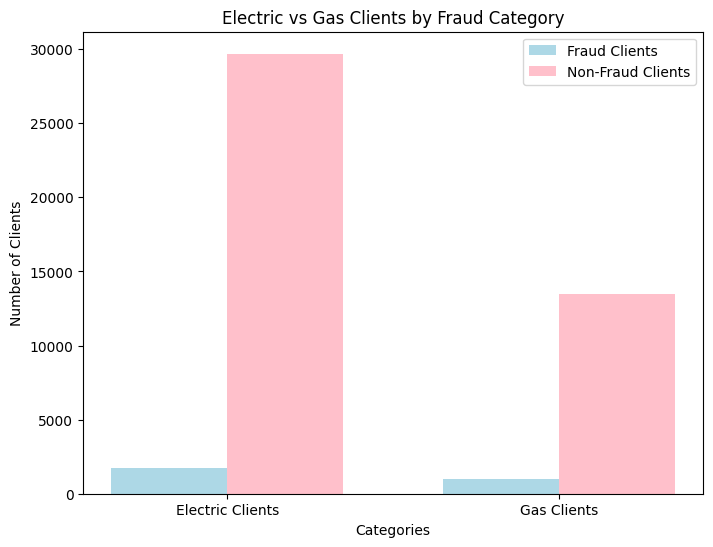

In [ ]:
Ele_clients = 31449
gas_clients = 14512


Ele_fraud_clients = 1756
gas_fraud_clients = 1018  

categories = ['Electric Clients', 'Gas Clients']
fraud_counts = [Ele_fraud_clients, gas_fraud_clients]
non_fraud_counts = [Ele_clients - Ele_fraud_clients, gas_clients - gas_fraud_clients]

# Set the width of the bars
bar_width = 0.35

# Create an array of x values for the bars
x = np.arange(len(categories))

# Create grouped bar chart
plt.figure(figsize=(8, 6))

# Plot fraud counts
plt.bar(x - bar_width/2, fraud_counts, bar_width, label='Fraud Clients', color='lightblue')

# Plot non-fraud counts
plt.bar(x + bar_width/2, non_fraud_counts, bar_width, label='Non-Fraud Clients', color='pink')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Number of Clients')
plt.title('Electric vs Gas Clients by Fraud Category')
plt.xticks(x, categories)
plt.legend()

# Show the plot
plt.show()

In [ ]:

column_to_check = 'target'
df_fraud_only_elc = df_fraud_elc[df_fraud_elc[column_to_check] != 0]

df_fraud_only_elc.head()

,ID,tarif_type,counter_statue,Min_Reading_Remark,Max_Reading_Remark,std_Reading_Remark,counter_coefficient,client_catg,region,target,Total_Consumption_Sum,Average_Consumption,Min_Consumption,Max_Consumption,Median_Consumption,Std_Consumption
19,114,11,0,6,9,1.345,1,11,310,1,10911,839.308,0,2209,851.000,577.227
23,118,11,0,6,9,1.358,1,11,313,1,14121,336.214,0,826,294.000,200.132
44,1010,10,0,6,9,1.549,1,11,103,1,250,41.667,0,247,0.000,100.600
50,1016,10,0,6,9,1.389,1,11,107,1,30952,814.526,0,1783,796.000,366.984
71,1037,10,0,6,8,0.458,1,11,101,1,1526,41.243,0,224,0.000,71.210


In [ ]:
df_fraud_only_elc.describe()

,ID,tarif_type,counter_statue,Min_Reading_Remark,Max_Reading_Remark,std_Reading_Remark,counter_coefficient,client_catg,region,target,Total_Consumption_Sum,Average_Consumption,Min_Consumption,Max_Consumption,Median_Consumption,Std_Consumption
count,1756.000,1756.000,1756.000,1756.000,1756.000,1756.000,1756.000,1756.000,1756.000,1756.000,1756.000,1756.000,1756.000,1756.000,1756.000,1756.000
mean,102401.850,11.029,0.054,6.225,8.964,1.159,1.000,12.567,208.154,1.000,27686.458,951.954,92.262,3576.585,726.815,854.593
std,33862.764,1.347,0.409,0.717,0.235,0.357,0.000,7.717,104.805,0.000,41748.612,1099.282,272.770,5577.440,849.409,1359.806
min,114.000,9.000,0.000,6.000,6.000,0.000,1.000,11.000,101.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,104340.500,11.000,0.000,6.000,9.000,1.101,1.000,11.000,103.000,1.000,10973.250,388.726,0.000,1201.000,297.750,272.398
50%,112132.500,11.000,0.000,6.000,9.000,1.285,1.000,11.000,301.000,1.000,17833.000,615.481,0.000,2026.500,493.250,460.660
75%,120229.500,11.000,0.000,6.000,9.000,1.377,1.000,11.000,309.000,1.000,29447.500,1040.617,79.250,3764.000,816.500,891.371
max,128430.000,29.000,5.000,9.000,9.000,2.121,1.000,51.000,399.000,1.000,662959.000,16736.350,6012.000,116645.000,12310.000,21748.264


In [ ]:
#2# Splitting the data:

y = df_fraud_elc_cate['target']
X = df_fraud_elc_cate.drop('target', axis=1)

X_train , X_test , y_train , y_test = train_test_split(X,y, stratify=y, test_size=0.2, random_state=RSEED)

In [ ]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (25159, 12)
X_test shape: (6290, 12)
y_train shape: (25159,)
y_test shape: (6290,)


In [ ]:
#### Random Forest analysis:

In [ ]:
#1# Training the module:
rf_mod = RandomForestClassifier(n_estimators=100, random_state=RSEED, min_weight_fraction_leaf=0.5)
rf_mod.fit(X_train, y_train)

RandomForestClassifier(min_weight_fraction_leaf=0.5, random_state=50)

In [ ]:
#2# Checking the Hyperparameters: 

params = rf_mod.get_params()

for param, value in params.items():
    print(f"{param}: {value}")

bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.5
n_estimators: 100
n_jobs: None
oob_score: False
random_state: 50
verbose: 0
warm_start: False


In [ ]:
#3# Making a prediction:
from sklearn.metrics import classification_report

#A# Train Data:
y_pred_train_rf = rf_mod.predict(X_train)
classif_train_rf = classification_report(y_train, y_pred_train_rf)

#B# Test Data:
y_pred_test_rf = rf_mod.predict(X_test)
classif_test_rf = classification_report(y_test, y_pred_test_rf)

In [ ]:
#3#Printing evaluation:
 
print(f"Train R F: \n {classif_train_rf}")

print(f"Test R F: \n {classif_test_rf}")

Train R F: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     23754
           1       0.00      0.00      0.00      1405

    accuracy                           0.94     25159
   macro avg       0.47      0.50      0.49     25159
weighted avg       0.89      0.94      0.92     25159

Test R F: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      5939
           1       0.00      0.00      0.00       351

    accuracy                           0.94      6290
   macro avg       0.47      0.50      0.49      6290
weighted avg       0.89      0.94      0.92      6290



In [ ]:
#### Logistc Regression analysis: 

In [ ]:
#2# Scaling the data for a better performance:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_stan = scaler.fit_transform(X_train)
X_test_stan = scaler.transform(X_test)

In [ ]:
log_mod = LogisticRegression(class_weight='balanced', penalty='l2', C=1.0, solver='liblinear', random_state=RSEED)
log_mod.fit(X_train_stan, y_train) 

LogisticRegression(class_weight='balanced', random_state=50, solver='liblinear')

In [ ]:
#2# Making a prediction:
#!pip install scikit-learn
from sklearn.metrics import accuracy_score, classification_report, recall_score


#A# Train Data:
y_pred_train_lr = log_mod.predict(X_train_stan)
classif_train_lr = classification_report(y_train, y_pred_train_lr)

#B# Test Data:
y_pred_test_lr = log_mod.predict(X_test_stan)	
classif_test_lr = classification_report(y_test, y_pred_test_lr)


In [ ]:
#3#Printing evaluation: 
print(f"Test Logistic Classification: \n {classif_test_lr}")

print(f"Train Logistic Classification: \n {classif_train_lr}")

Test Logistic Classification: 
               precision    recall  f1-score   support

           0       0.97      0.53      0.69      5939
           1       0.08      0.74      0.15       351

    accuracy                           0.54      6290
   macro avg       0.53      0.63      0.42      6290
weighted avg       0.92      0.54      0.66      6290

Train Logistic Classification: 
               precision    recall  f1-score   support

           0       0.97      0.52      0.68     23754
           1       0.08      0.73      0.15      1405

    accuracy                           0.53     25159
   macro avg       0.53      0.63      0.41     25159
weighted avg       0.92      0.53      0.65     25159



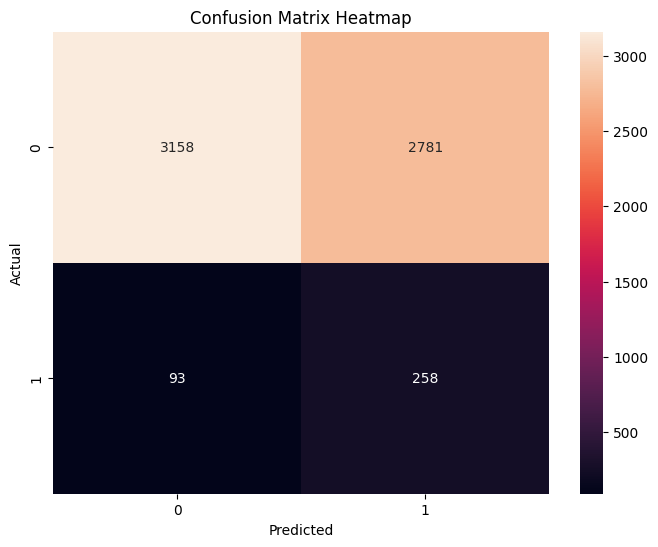

In [ ]:
# conf_matrix= pd.crosstab(y_test, y_pred_test_lr, rownames=['Actual'], colnames=['Predicted'])
# sns.heatmap(conf_matrix, annot=True);


plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(conf_matrix, annot=True, fmt='d')  # fmt='d' ensures integer formatting
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']
}

# Initialize logistic regression model
log_reg = LogisticRegression()

# Perform hyperparameter tuning using GridSearchCV or RandomizedSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_stan, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_


In [ ]:
best_params

{'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:

# Create a new logistic regression model with the best hyperparameters
best_log_reg = LogisticRegression(C=0.001, penalty='l1', solver='liblinear')

# Fit the model to your training data
best_log_reg.fit(X_train_stan, y_train)


LogisticRegression(C=0.001, penalty='l1', solver='liblinear')

In [ ]:
#A# Train Data:
y_pred_train_lrn = log_mod.predict(X_train_stan)
classif_train_lrn = classification_report(y_train, y_pred_train_lrn)

#B# Test Data:
y_pred_test_lrn = log_mod.predict(X_test_stan)	
classif_test_lrn = classification_report(y_test, y_pred_test_lrn)

In [ ]:
#3#Printing evaluation: 
print(f"Test Logistic Classification: \n {classif_test_lrn}")

print(f"Train Logistic Classification: \n {classif_train_lrn}")

Test Logistic Classification: 
               precision    recall  f1-score   support

           0       0.98      0.41      0.58      5939
           1       0.08      0.85      0.14       351

    accuracy                           0.43      6290
   macro avg       0.53      0.63      0.36      6290
weighted avg       0.93      0.43      0.55      6290

Train Logistic Classification: 
               precision    recall  f1-score   support

           0       0.98      0.40      0.57     23754
           1       0.08      0.86      0.14      1405

    accuracy                           0.43     25159
   macro avg       0.53      0.63      0.36     25159
weighted avg       0.93      0.43      0.54     25159

